**Gender Prediction for E-Commerce** 

With the evolution of the information and communication technologies and the rapid growth of the Internet for the exchange and distribution of information, Electronic Commerce (e-commerce) has gained massive momentum globally, and attracted more and more worldwide users overcoming the time constraints and distance barriers.

It is important to gain in-depth insights into e-commerce via data-driven analytics and identify the factors affecting product sales, the impact of characteristics of customers on their purchase habits.

It is quite useful to understand the demand, habits, concern, perception, and interest of customers from the clue of genders for e-commerce companies. 

However, the genders of users are in general unavailable in e-commerce platforms. To address this gap the aim here is to predict the gender of e-commerce’s participants from their product viewing records.


**Data Dictionary**

**Train file**: 

CSV containing the product viewing data with gender as label


<pre>
Variable 	   Definition <br>
session_id   Session ID <br>
startTime	   Start time of the session <br>
endTime	     End Time of the session <br>
ProductList	 List of products viewed <br>
gender	     (Target) male/female <br>
</pre>

Product list contains list of products viewed by the user in the given session and it also contains the category, sub category, sub-sub category and the product all encoded and separated with a slash symbol. Each consecutive product is separated with a semicolon.

**Test file**: <br> CSV containing sessions for which gender prediction is to be submitted

<pre>
Variable	    Definition <br>
session_id	  Session ID <br>
startTime	    Start time of the session <br>
endTime	      End Time of the session <br>
ProductList	  List of products viewed <br>
</pre>

Submission file format

<pre>
Variable	  Definition <br>
session_id	Session ID <br>
gender	    (Target) Male/Female 
</pre>



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Workbook

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
import re
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [0]:
train = pd.read_csv('/content/drive/My Drive/Gender classification_AV3/train.csv')
test = pd.read_csv('/content/drive/My Drive/Gender classification_AV3/test.csv')

In [0]:
train['IS_TRAIN'] = 1
test['IS_TRAIN'] = 0

In [0]:
df = pd.concat([train,test])

In [0]:
df.columns = [x.upper() for x in df.columns]

In [202]:
df['IS_TRAIN'].value_counts()

1    10500
0     4500
Name: IS_TRAIN, dtype: int64

**Creating a product dictionary**

In [203]:
train.head()

,session_id,startTime,endTime,ProductList,gender,IS_TRAIN
0,u16159,15/12/14 18:11,15/12/14 18:12,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1
1,u10253,16/12/14 14:35,16/12/14 14:41,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,1
2,u19037,01/12/14 15:58,01/12/14 15:58,A00002/B00001/C00020/D16944/,female,1
3,u14556,23/11/14 2:57,23/11/14 3:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,1
4,u24295,17/12/14 16:44,17/12/14 16:46,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,1


In [0]:
def product_list(df):
  products = []

  for e,i in enumerate(df['ProductList'].tolist()):
    items = i.split(';')
    products.extend(items)
  return products

products = product_list(train)


In [0]:
def category_list(products):
  
  c1 = defaultdict(list)
  c2 = defaultdict(list)
  c3 = defaultdict(list)

  for i in products:
    value = i.split('/')
    # print(value[0])
    if value[1] not in c1[value[0]]:
      c1[value[0]].append(value[1])
    if value[2] not in c2[value[1]]:
      c2[value[1]].append(value[2])
    if value[3] not in c3[value[2]]:
      c3[value[2]].append(value[3])   

  return c1,c2,c3  



In [0]:
c1,c2,c3 = category_list(products)

In [207]:
print('Number of categories', len(c1.keys()))
print('Number of sub categories', len(c2.keys()))
print('Number of sub sub categories',len(c3.keys()))


Number of categories 11
Number of sub categories 85
Number of sub sub categories 360


In [0]:
def category_l3(c3):
  c3_val = defaultdict(list)
  for i in c3.keys():
    c3_val[i] = len(c3[i])
  return c3_val

def category_l2(c2,c3_val):
  c2_val = defaultdict(list)
  for i in c2.keys():
    count = 0
    for j in c2[i]:
      count += c3_val[j]
    c2_val[i] = count
  return c2_val

def category_l1(c1, c2_val):
  c1_val = defaultdict(list)
  for i in c1.keys():
    count = 0
    for j in c1[i]:
      count += c2_val[j]
    c1_val[i] = count
  return c1_val

In [0]:
c3_val = category_l3(c3)
c2_val = category_l2(c2, c3_val)
c1_val = category_l1(c1, c2_val)

In [210]:
print(sum(c1_val.values()))

35226


Including both training and test

1. Total number of products available is 46998
2. Number of categories 11
3. Number of sub categories 86



In [211]:
for i in c1.keys():
  print('Number of sub categories in', i, len(c1[i]))

Number of sub categories in A00002 12
Number of sub categories in A00001 8
Number of sub categories in A00003 15
Number of sub categories in A00004 3
Number of sub categories in A00005 11
Number of sub categories in A00006 10
Number of sub categories in A00011 3
Number of sub categories in A00007 5
Number of sub categories in A00010 12
Number of sub categories in A00008 2
Number of sub categories in A00009 9


validating the above logic

In [212]:
print(c1_val['A00008'])
print(c2['B00029'], c2['B00043'])
print(c2_val['B00029'], c2_val['B00043'])
print(c3['C00144'], c3['C00088'], c3['C00143'])
print(c3_val['C00144'], c3_val['C00088'], c3_val['C00143'])


31
['C00144', 'C00088'] ['C00143']
19 12
['D20717', 'D03029', 'D03030', 'D06539'] ['D21715', 'D05566', 'D02012', 'D18252', 'D14434', 'D18248', 'D06643', 'D18614', 'D01914', 'D01750', 'D34649', 'D05853', 'D01196', 'D01197', 'D05882'] ['D34503', 'D13109', 'D13116', 'D01199', 'D06536', 'D06537', 'D06538', 'D34494', 'D34495', 'D34496', 'D34500', 'D14732']
4 15 12


**Analysing the amount of time spent**

session_id is unique, ignore this feature

In [0]:
df[['STARTTIME','ENDTIME']] = df[['STARTTIME','ENDTIME']].apply(pd.to_datetime, format = '%d/%m/%y %H:%M')

In [0]:
df['TIME_SPENT_MINS'] = (df['ENDTIME'] - df['STARTTIME']).dt.total_seconds()/60

In [0]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    for n in ('Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    # df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)
    df.columns = [x.upper() for x in df.columns]
    return df

In [0]:
df = add_datepart(df, 'STARTTIME', False)

In [217]:
df[df.select_dtypes(bool).columns].head()

,STARTTIMEIS_MONTH_END,STARTTIMEIS_MONTH_START,STARTTIMEIS_QUARTER_END,STARTTIMEIS_QUARTER_START,STARTTIMEIS_YEAR_END,STARTTIMEIS_YEAR_START
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,True,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


In [0]:
df[df.select_dtypes(bool).columns] = df[df.select_dtypes(bool).columns].astype('int')

In [0]:
# train['SESSION_HOUR']
df['HOUR'] = df['STARTTIME'].dt.hour

b = [-1,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
df['DAYTYPE'] = pd.cut(df['HOUR'], bins=b, labels=l)

In [0]:
dayweek = df.groupby(['GENDER','STARTTIMEDAYOFWEEK']).agg({'SESSION_ID':'count'}).reset_index()
dayweek.loc[(dayweek['GENDER']== 'female'),'PERCENTAGE'] = (dayweek['SESSION_ID'] / dayweek[dayweek['GENDER']=='female']['SESSION_ID'].sum())*100
dayweek.loc[(dayweek['GENDER']== 'male'),'PERCENTAGE'] = (dayweek['SESSION_ID'] / dayweek[dayweek['GENDER']=='male']['SESSION_ID'].sum())*100

In [221]:
dayweek

,GENDER,STARTTIMEDAYOFWEEK,SESSION_ID,PERCENTAGE
0,female,0,1538,18.774414
1,female,1,1299,15.856934
2,female,2,810,9.887695
3,female,3,651,7.946777
4,female,4,1510,18.432617
5,female,5,1460,17.822266
6,female,6,924,11.279297
7,male,0,432,18.717504
8,male,1,341,14.774697
9,male,2,240,10.398614


In [0]:
daytype = df.groupby(['GENDER','HOUR']).agg({'SESSION_ID':'count'}).reset_index()
daytype.loc[(daytype['GENDER']== 'female'),'PERCENTAGE'] = (daytype['SESSION_ID'] / daytype[daytype['GENDER']=='female']['SESSION_ID'].sum())*100
daytype.loc[(daytype['GENDER']== 'male'),'PERCENTAGE'] = (daytype['SESSION_ID'] / daytype[daytype['GENDER']=='male']['SESSION_ID'].sum())*100

In [223]:
daytype

,GENDER,HOUR,SESSION_ID,PERCENTAGE
0,female,0,98,1.196289
1,female,1,49,0.598145
2,female,2,19,0.231934
3,female,3,23,0.280762
4,female,4,16,0.195312
5,female,5,34,0.415039
6,female,6,58,0.708008
7,female,7,166,2.026367
8,female,8,483,5.895996
9,female,9,623,7.604980


In [0]:
daytype1 = df.groupby(['GENDER','DAYTYPE']).agg({'SESSION_ID':'count'}).reset_index()
daytype1.loc[(daytype1['GENDER']== 'female'),'PERCENTAGE'] = (daytype1['SESSION_ID'] / daytype1[daytype1['GENDER']=='female']['SESSION_ID'].sum())*100
daytype1.loc[(daytype1['GENDER']== 'male'),'PERCENTAGE'] = (daytype1['SESSION_ID'] / daytype1[daytype1['GENDER']=='male']['SESSION_ID'].sum())*100

In [225]:
daytype1

,GENDER,DAYTYPE,SESSION_ID,PERCENTAGE
0,female,Late Night,205,2.502441
1,female,Early Morning,741,9.045410
2,female,Morning,2345,28.625488
3,female,Noon,2411,29.431152
4,female,Eve,1391,16.979980
5,female,Night,1099,13.415527
6,male,Late Night,107,4.636049
7,male,Early Morning,171,7.409012
8,male,Morning,550,23.830156
9,male,Noon,536,23.223570


In [226]:
df[(df['TIME_SPENT_MINS']!=0) & (df['GENDER']=='male')].describe()

,IS_TRAIN,TIME_SPENT_MINS,STARTTIMEMONTH,STARTTIMEWEEK,STARTTIMEDAY,STARTTIMEDAYOFWEEK,STARTTIMEDAYOFYEAR,STARTTIMEIS_MONTH_END,STARTTIMEIS_MONTH_START,STARTTIMEIS_QUARTER_END,STARTTIMEIS_QUARTER_START,STARTTIMEIS_YEAR_END,STARTTIMEIS_YEAR_START,HOUR
count,1030.0,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.0,1030.0,1030.0,1030.0,1030.000000
mean,1.0,316.361165,11.596117,48.992233,16.111650,3.049515,337.995146,0.001942,0.021359,0.0,0.0,0.0,0.0,14.823301
std,0.0,2464.289052,0.490913,1.819327,6.613747,2.103372,12.304170,0.044044,0.144649,0.0,0.0,0.0,0.0,5.573769
min,1.0,1.000000,11.000000,46.000000,1.000000,0.000000,318.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,1.0,1.000000,11.000000,47.000000,12.000000,1.000000,326.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,11.000000
50%,1.0,2.000000,12.000000,49.000000,17.000000,3.000000,341.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,15.000000
75%,1.0,5.000000,12.000000,51.000000,21.000000,5.000000,349.750000,0.000000,0.000000,0.0,0.0,0.0,0.0,20.000000
max,1.0,36982.000000,12.000000,52.000000,30.000000,6.000000,356.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,23.000000


Insights from date field
1. 50% of records has same start time and end time
2. In the remaining records female and male has pretty much have the same duration
3. We can observe that from the above analysis female mostly browse on sunday, thursday, friday and monday where as male mostly browse on sunday, thursday, saturday and friday
4. Womens mostly browse in the noon where as mens mostly browse in the evening







In [0]:
backup = df.copy()

**Features based on the product category**

To analyse further based on the count products or type of products purchased

In [0]:
# creating empty columns
# for i in sorted(c1.keys()):
#   df[i] = 0

# sub_cat = ['_'.join([i,j]) for i in c1.keys() for j in c1[i]]

# for sub in sub_cat:
#   df[sub] = 0

In [0]:
def nos_product(x):
  prod_list = x.split(';')
  return len(prod_list)


In [0]:
df['VIEWED_PRODUCT_NOS'] = df['PRODUCTLIST'].apply(lambda x: nos_product(x))

we can see there are three sub categories appearing under different categories

In [0]:
subcat = []
for sub in c1.values():
  subcat.extend(sub)

In [0]:
subcat_count = Counter(subcat)

In [220]:
for i in subcat_count.keys():
  if subcat_count[i]>1:
    print(i,subcat_count[i])

B00001 2
B00004 4
B00011 2


Creating category as columns along with the count

In [0]:
# based on the analysis selected these columns 
req_columns = [ 'A00002_B00002_C00007', 'A00001_B00009_C00028', 'A00001_B00001_C00019',\
'A00002_B00002_C00007', 'A00002_B00002_C00002', 'A00002_B00002_C00003',\
'A00002_B00002', 'A00001_B00001', 'A00002_B00001', 'A00001_B00015',\
'A00001_B00004', 'A00001_B00031', 'A00003_B00012', 'A00002_B00007',\
'A00003_B00022', 'A00002_B00004','A00002_B00005', 'A00002_B00016', \
'A00002_B00017','A00002', 'A00001', 'A00003', 'A00004', 'A00005',\
 'A00006', 'A00011', 'A00007', 'A00010', 'A00008', 'A00009']

In [0]:
for c in req_columns:
  df[c]=0

In [0]:
def creating_col(item, count_item, req_columns):
  if count_item == 2:
    subitem = '_'.join([item[0],item[1]])
  elif count_item == 3:
    subitem = '_'.join([item[0],item[1],item[3]])
  else:
    subitem = item[0]  
    if subitem in df.columns:
      df.at[i,subitem] +=1
  return df

In [0]:
for i, row in df.iterrows():
  ind_prod = row['PRODUCTLIST'].split(';')
  for p in ind_prod:
    item = p.split('/')
    df = creating_col(item, 1, req_columns)
    df = creating_col(item, 2, req_columns)
    df = creating_col(item, 3, req_columns)
    # subitem = '_'.join([item[0],item[1]])
    # if subitem in req_columns:
    #   df.at[i,subitem] +=1
    # else:
    #   df[subitem]=0
    #   df.at[i,subitem] +=1
    # df.at[i,item[0]] +=1
    # if subitem in df.columns:
      # df.at[i,subitem] +=1
    # break

In [238]:
df.head()

,SESSION_ID,STARTTIME,ENDTIME,PRODUCTLIST,GENDER,IS_TRAIN,TIME_SPENT_MINS,STARTTIMEMONTH,STARTTIMEWEEK,STARTTIMEDAY,STARTTIMEDAYOFWEEK,STARTTIMEDAYOFYEAR,STARTTIMEIS_MONTH_END,STARTTIMEIS_MONTH_START,STARTTIMEIS_QUARTER_END,STARTTIMEIS_QUARTER_START,STARTTIMEIS_YEAR_END,STARTTIMEIS_YEAR_START,HOUR,DAYTYPE,VIEWED_PRODUCT_NOS,A00002_B00002_C00007,A00001_B00009_C00028,A00001_B00001_C00019,A00002_B00002_C00002,A00002_B00002_C00003,A00002_B00002,A00001_B00001,A00002_B00001,A00001_B00015,A00001_B00004,A00001_B00031,A00003_B00012,A00002_B00007,A00003_B00022,A00002_B00004,A00002_B00005,A00002_B00016,A00002_B00017,A00002,A00001,A00003,A00004,A00005,A00006,A00011,A00007,A00010,A00008,A00009
0,u16159,2014-12-15 18:11:00,2014-12-15 18:12:00,A00002/B00003/C00006/D28435/;A00002/B00003/C00...,female,1,1.0,12,51,15,0,349,0,0,0,0,0,0,18,Eve,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
1,u10253,2014-12-16 14:35:00,2014-12-16 14:41:00,A00001/B00009/C00031/D29404/;A00001/B00009/C00...,male,1,6.0,12,51,16,1,350,0,0,0,0,0,0,14,Noon,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0
2,u19037,2014-12-01 15:58:00,2014-12-01 15:58:00,A00002/B00001/C00020/D16944/,female,1,0.0,12,49,1,0,335,0,1,0,0,0,0,15,Noon,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,u14556,2014-11-23 02:57:00,2014-11-23 03:00:00,A00002/B00004/C00018/D10284/;A00002/B00004/C00...,female,1,3.0,11,47,23,6,327,0,0,0,0,0,0,2,Late Night,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0
4,u24295,2014-12-17 16:44:00,2014-12-17 16:46:00,A00001/B00001/C00012/D30805/;A00001/B00001/C00...,male,1,2.0,12,51,17,2,351,0,0,0,0,0,0,16,Noon,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0




1.   A00002 25% of the men viewed this product atleast once and 75% of the women viewed this product atleast once



Calculating the ratio of each category products on total number of products visited

In [0]:
# for i in c1.keys():
#   train[i] = train[i]*train['NUMBER_OF_PRODUCTS']

In [0]:
def cat_products(df,c1_val, c2_val):
  for i in sorted(c1_val.keys()):
    df[i] = df[i]*c1_val[i]
  # for j in sorted(c2_val.keys()):
  #   col = [ c for c in df.columns  if j in c ]
  #   df[col] = df[col]*c2_val[j]
  return df

In [0]:
# df = cat_products(df,c1_val, c2_val)

Category selection analysis

In [0]:
pd.set_option('display.max_rows',100)
female = pd.DataFrame(df[df['GENDER'] == 'female'].sum(axis=0)[21:]).sort_values(by=[0], ascending=False)

In [0]:
pd.set_option('display.max_rows',100)
male = pd.DataFrame(df[df['GENDER'] == 'male'].sum(axis=0)[21:]).sort_values(by=[0], ascending=False)

In [0]:
male['m_percent']=male[0]/male[0].sum()*100
female['f_percent']=female[0]/female[0].sum()*100

In [178]:
male.sort_values(by=['m_percent'], ascending=False).head(10).index

Index(['A00002_B00002', 'A00001_B00001', 'A00002_B00001', 'A00001_B00015',
       'A00001_B00004', 'A00001_B00031', 'A00003_B00012', 'A00002_B00007',
       'A00003_B00022', 'A00002_B00004'],
      dtype='object')

In [180]:
female.sort_values(by=['f_percent'], ascending=False).head(10).index

Index(['A00002_B00002', 'A00002_B00001', 'A00003_B00012', 'A00002_B00007',
       'A00003_B00022', 'A00002_B00004', 'A00002_B00005', 'A00001_B00001',
       'A00002_B00016', 'A00002_B00017'],
      dtype='object')

**TRAIN AND TEST** 

In [0]:
train = df[df['IS_TRAIN']==1]
test = df[df['IS_TRAIN']==0]

In [0]:
train.drop(['SESSION_ID','STARTTIME','ENDTIME','PRODUCTLIST','IS_TRAIN'], axis=1, inplace=True)
test.drop(['STARTTIME','ENDTIME','PRODUCTLIST','IS_TRAIN'], axis=1, inplace=True)

In [0]:
train['GENDER'] = train['GENDER'].replace({'male':0,'female':1})

In [482]:

print(train.shape)
print(test.shape)

#test set has session id as extra column in this

(10500, 45)
(4500, 46)


**FEATURE SCALING**

For cyclic features using sin conversion and for huge values using standard scaler

In [0]:
cyclic_features = ['HOUR']

In [0]:
train[cyclic_features] = np.sin(train[cyclic_features])
test[cyclic_features] = np.sin(test[cyclic_features])

In [0]:
to_normalise = ['TIME_SPENT_MINS'] 
#+ sorted(c1.keys())

In [0]:
scaler = StandardScaler()
train[to_normalise] = scaler.fit_transform(train[to_normalise])
test[to_normalise] = scaler.transform(test[to_normalise])

In [487]:
train.head()

,GENDER,TIME_SPENT_MINS,STARTTIMEMONTH,STARTTIMEWEEK,STARTTIMEDAY,STARTTIMEDAYOFWEEK,STARTTIMEDAYOFYEAR,STARTTIMEIS_MONTH_END,STARTTIMEIS_MONTH_START,STARTTIMEIS_QUARTER_END,STARTTIMEIS_QUARTER_START,STARTTIMEIS_YEAR_END,STARTTIMEIS_YEAR_START,HOUR,DAYTYPE,VIEWED_PRODUCT_NOS,A00002_B00002_C00007,A00001_B00009_C00028,A00001_B00001_C00019,A00002_B00002_C00002,A00002_B00002_C00003,A00002_B00002,A00001_B00001,A00002_B00001,A00001_B00015,A00001_B00004,A00001_B00031,A00003_B00012,A00002_B00007,A00003_B00022,A00002_B00004,A00002_B00005,A00002_B00016,A00002_B00017,A00002,A00001,A00003,A00004,A00005,A00006,A00011,A00007,A00010,A00008,A00009
0,1,-0.068114,12,51,15,0,349,0,0,0,0,0,0,-0.750987,Eve,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0
1,0,-0.065333,12,51,16,1,350,0,0,0,0,0,0,0.990607,Noon,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0
2,1,-0.068670,12,49,1,0,335,0,1,0,0,0,0,0.650288,Noon,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0
3,1,-0.067002,11,47,23,6,327,0,0,0,0,0,0,0.909297,Late Night,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0
4,0,-0.067558,12,51,17,2,351,0,0,0,0,0,0,-0.287903,Noon,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0


In [0]:
train['DAYTYPE'] = train['DAYTYPE'].astype('category')
test['DAYTYPE'] = test['DAYTYPE'].astype('category')

In [489]:
train.columns[10:30]

Index(['STARTTIMEIS_QUARTER_START', 'STARTTIMEIS_YEAR_END',
       'STARTTIMEIS_YEAR_START', 'HOUR', 'DAYTYPE', 'VIEWED_PRODUCT_NOS',
       'A00002_B00002_C00007', 'A00001_B00009_C00028', 'A00001_B00001_C00019',
       'A00002_B00002_C00002', 'A00002_B00002_C00003', 'A00002_B00002',
       'A00001_B00001', 'A00002_B00001', 'A00001_B00015', 'A00001_B00004',
       'A00001_B00031', 'A00003_B00012', 'A00002_B00007', 'A00003_B00022'],
      dtype='object')

In [0]:
# For Random forest and neural network implementation

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

train['DAYTYPE']= le.fit_transform(train['DAYTYPE'].astype('str'))
test['DAYTYPE']= le.transform(test['DAYTYPE'].astype('str'))

SPLITTING train and validation set

In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(train.drop(['GENDER'], axis=1), \
                                                  train['GENDER'].astype('int'),
                                                    test_size=0.2,shuffle=True,
                                                    random_state=0,
                                                    stratify=train['GENDER'])

In [278]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(8400, 44)
(8400,)
(2100, 44)
(2100,)


In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,matthews_corrcoef
import pandas as pd
def evaluate_model(y_pred):
  cm = confusion_matrix(y_val, y_pred)
  cm_df = pd.DataFrame(cm.T)
  cm_df.index.name = 'Predicted'
  cm_df.columns.name = 'True'
  print('CONFUSION MATRIX')
  print(cm_df)
  print('CLASSIFICATION REPORT')
  print(classification_report(y_val,y_pred))
  print('MATHEWS CORRELATION COEFFICIENT')
  print(matthews_corrcoef(y_val,y_pred))

Neural Network

In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Activation, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer

model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [310]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 256)               11520     
_________________________________________________________________
dense_19 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 513       
Total params: 931,585
Trainable params: 931,585
Non-trainable params: 0
________________________________________________

In [0]:
from tensorflow.keras.optimizers import RMSprop,SGD

opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
# sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
# from tensorflow.keras.optimizers import adam,SGD
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.python.keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('nn_weights.hdf5', monitor='val_acc', verbose=1, patience=20, save_best_only=True, mode='auto')

In [316]:
model.fit(x=x_train, y=y_train, class_weight= {0:1,1:1},
          batch_size=32,
          epochs=50,callbacks=[checkpoint],
          verbose=1,
          validation_data=(x_val,y_val)
                      )

Epoch 1/50
263/263 [==============================] - 1s 5ms/step - loss: 0.3962 - accuracy: 0.8479 - val_loss: 0.3831 - val_accuracy: 0.8557
Epoch 2/50
263/263 [==============================] - 1s 4ms/step - loss: 0.3918 - accuracy: 0.8506 - val_loss: 0.3773 - val_accuracy: 0.8600
Epoch 3/50
263/263 [==============================] - 1s 5ms/step - loss: 0.3907 - accuracy: 0.8496 - val_loss: 0.3875 - val_accuracy: 0.8576
Epoch 4/50
263/263 [==============================] - 1s 5ms/step - loss: 0.3896 - accuracy: 0.8533 - val_loss: 0.3832 - val_accuracy: 0.8567
Epoch 5/50
263/263 [==============================] - 1s 5ms/step - loss: 0.3940 - accuracy: 0.8504 - val_loss: 0.3807 - val_accuracy: 0.8571
Epoch 6/50
263/263 [==============================] - 1s 4ms/step - loss: 0.3928 - accuracy: 0.8496 - val_loss: 0.3918 - val_accuracy: 0.8571
Epoch 7/50
263/263 [==============================] - 1s 5ms/step - loss: 0.3935 - accuracy: 0.8480 - val_loss: 0.3848 - val_accuracy: 0.8548
Epoch 

In [0]:
nn_pred = model.predict(x_val)
y_pred = np.where(nn_pred<0.44,0,1)

In [0]:
nn_test = model.predict(test[x_train.columns])
nn_res = np.where(nn_test<0.44,0,1)

In [574]:
evaluate_model(y_pred)

CONFUSION MATRIX
True         0     1
Predicted           
0          233    71
1          229  1567
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.77      0.50      0.61       462
           1       0.87      0.96      0.91      1638

    accuracy                           0.86      2100
   macro avg       0.82      0.73      0.76      2100
weighted avg       0.85      0.86      0.85      2100

MATHEWS CORRELATION COEFFICIENT
0.5427168714513624


In [331]:
from xgboost import XGBClassifier
	
# fit model no training data
model_xg = XGBClassifier(class_weight='balanced')
model_xg.fit(x_train, y_train, eval_metric='auc')

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
xg_pred = model_xg.predict_proba(x_val)

In [333]:
y_pred = np.argmax(xg_pred, axis=1)
evaluate_model(y_pred)

CONFUSION MATRIX
True         0     1
Predicted           
0          232    75
1          230  1563
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.76      0.50      0.60       462
           1       0.87      0.95      0.91      1638

    accuracy                           0.85      2100
   macro avg       0.81      0.73      0.76      2100
weighted avg       0.85      0.85      0.84      2100

MATHEWS CORRELATION COEFFICIENT
0.535109069259659


In [0]:
import lightgbm as lgb
model_lgbm  = lgb.LGBMClassifier(class_weight='balanced',objective='binary')

In [335]:
model_lgbm.fit(x_train, y_train, eval_set=(x_val,y_val), eval_metric='auc', categorical_feature=['DAYTYPE'])

[1]	valid_0's auc: 0.800331	valid_0's binary_logloss: 0.662337
[2]	valid_0's auc: 0.806763	valid_0's binary_logloss: 0.637221
[3]	valid_0's auc: 0.805199	valid_0's binary_logloss: 0.616786
[4]	valid_0's auc: 0.80738	valid_0's binary_logloss: 0.599316
[5]	valid_0's auc: 0.807008	valid_0's binary_logloss: 0.584727
[6]	valid_0's auc: 0.805713	valid_0's binary_logloss: 0.572069
[7]	valid_0's auc: 0.806722	valid_0's binary_logloss: 0.560972
[8]	valid_0's auc: 0.809922	valid_0's binary_logloss: 0.551766
[9]	valid_0's auc: 0.810615	valid_0's binary_logloss: 0.544268
[10]	valid_0's auc: 0.812572	valid_0's binary_logloss: 0.537002
[11]	valid_0's auc: 0.813289	valid_0's binary_logloss: 0.531145
[12]	valid_0's auc: 0.814315	valid_0's binary_logloss: 0.526174
[13]	valid_0's auc: 0.81614	valid_0's binary_logloss: 0.519747
[14]	valid_0's auc: 0.816461	valid_0's binary_logloss: 0.515879
[15]	valid_0's auc: 0.819393	valid_0's binary_logloss: 0.512167
[16]	valid_0's auc: 0.818132	valid_0's binary_loglo

LGBMClassifier(boosting_type='gbdt', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='binary', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [0]:
lgb_pred = model_lgbm.predict_proba(x_val)

In [337]:
y_pred = np.argmax(lgb_pred, axis=1)
evaluate_model(y_pred)

CONFUSION MATRIX
True         0     1
Predicted           
0          302   197
1          160  1441
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.61      0.65      0.63       462
           1       0.90      0.88      0.89      1638

    accuracy                           0.83      2100
   macro avg       0.75      0.77      0.76      2100
weighted avg       0.84      0.83      0.83      2100

MATHEWS CORRELATION COEFFICIENT
0.5191513556155081


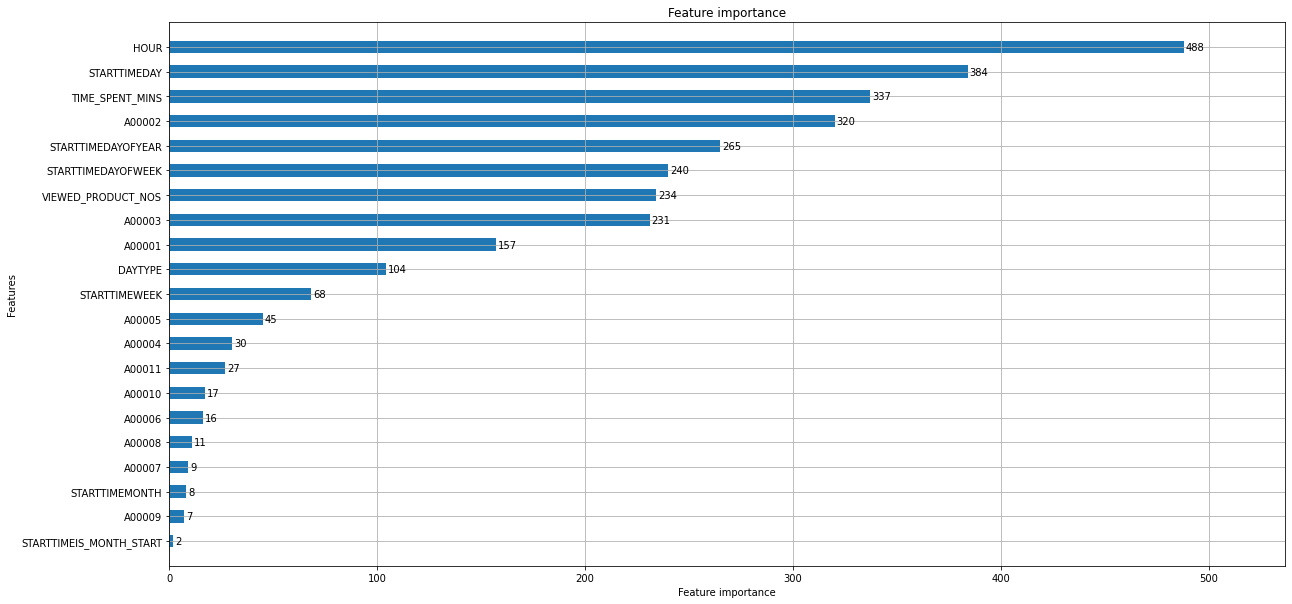

In [338]:
lgb.plot_importance(model_lgbm, height=0.5,ignore_zero=True, figsize=(20,10))

In [0]:
# !pip install catboost
import catboost
model_cat = catboost.CatBoostClassifier(eval_metric='Logloss')

In [0]:
categorical_features_indices = x_train.columns.get_indexer(['DAYTYPE'])

In [548]:
model_cat.fit(x_train,y_train,cat_features=[13], eval_set=(x_val,y_val))

Learning rate set to 0.053605
0:	learn: 0.6592962	test: 0.6584736	best: 0.6584736 (0)	total: 9.13ms	remaining: 9.12s
1:	learn: 0.6293053	test: 0.6279476	best: 0.6279476 (1)	total: 19.7ms	remaining: 9.85s
2:	learn: 0.6041830	test: 0.6024489	best: 0.6024489 (2)	total: 29.6ms	remaining: 9.84s
3:	learn: 0.5812301	test: 0.5789848	best: 0.5789848 (3)	total: 39.2ms	remaining: 9.75s
4:	learn: 0.5623676	test: 0.5597811	best: 0.5597811 (4)	total: 49ms	remaining: 9.76s
5:	learn: 0.5439208	test: 0.5407338	best: 0.5407338 (5)	total: 58.1ms	remaining: 9.63s
6:	learn: 0.5283914	test: 0.5248865	best: 0.5248865 (6)	total: 67.2ms	remaining: 9.54s
7:	learn: 0.5128228	test: 0.5087554	best: 0.5087554 (7)	total: 76.1ms	remaining: 9.44s
8:	learn: 0.5013971	test: 0.4972222	best: 0.4972222 (8)	total: 84.8ms	remaining: 9.34s
9:	learn: 0.4908716	test: 0.4866199	best: 0.4866199 (9)	total: 93.3ms	remaining: 9.23s
10:	learn: 0.4810451	test: 0.4763755	best: 0.4763755 (10)	total: 103ms	remaining: 9.26s
11:	learn: 0.4

In [0]:
cat_pred = model_cat.predict(x_val)
cat_test = model_cat.predict(test[x_train.columns])

In [550]:
evaluate_model(cat_pred)

CONFUSION MATRIX
True         0     1
Predicted           
0          249    87
1          213  1551
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.74      0.54      0.62       462
           1       0.88      0.95      0.91      1638

    accuracy                           0.86      2100
   macro avg       0.81      0.74      0.77      2100
weighted avg       0.85      0.86      0.85      2100

MATHEWS CORRELATION COEFFICIENT
0.5489830896849044


In [0]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0,n_estimators=800,class_weight='balanced')

In [346]:
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
rf_pred = clf.predict(x_val)

In [349]:
evaluate_model(rf_pred)

CONFUSION MATRIX
True         0     1
Predicted           
0          236   141
1          226  1497
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.63      0.51      0.56       462
           1       0.87      0.91      0.89      1638

    accuracy                           0.83      2100
   macro avg       0.75      0.71      0.73      2100
weighted avg       0.82      0.83      0.82      2100

MATHEWS CORRELATION COEFFICIENT
0.4584476526705689


HYPER PARAMETER TUNING

In [0]:
# Objective Function
train_data = lgb.Dataset(data=x_train, label=y_train, free_raw_data=False)
def lgb_eval(learning_rate,num_leaves, feature_fraction,\
             bagging_fraction, max_depth, \
             lambda_l1, lambda_l2,\
             min_split_gain, min_child_weight,subsample):
        params = {'application':'binary','num_iterations': 1500,
                  'early_stopping_round':150,'class_weight':'balanced',
                  'metric':'auc'} # ,'boost_from_average':False}
        params['learning_rate'] = max(min(learning_rate, 1), 0)          
        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['lambda_l1'] = max(lambda_l1, 0)
        params['lambda_l2'] = max(lambda_l2, 0)
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight,
        params['subsample'] = max(min(subsample, 1), 0)
        cv_result = lgb.cv(params, train_data, nfold=5, seed=11,
                           stratified=True,categorical_feature=['DAYTYPE'],
                            verbose_eval =None)
        return max(cv_result['auc-mean'])

In [0]:
pbs = {'learning_rate': (0.01, 1.0),
    'num_leaves': (200, 400),
        'feature_fraction': (0.1, 0.9),
        'bagging_fraction': (0.8, 1),
        'max_depth': (11, 29),
        'lambda_l1': (0, 2),
        'lambda_l2': (0, 3),
        'min_split_gain': (0.001, 0.1),
        'min_child_weight': (1, 10),
       'subsample': (0.01, 1.0)
      }

In [354]:
!pip install bayesian-optimization
from bayes_opt import BayesianOptimization
optimizer = BayesianOptimization(lgb_eval, pbs, random_state=0)
optimizer.maximize(init_points=5, n_iter=30)

|   iter    |  target   | baggin... | featur... | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | min_sp... | num_le... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------------------
|  1        |  0.7976   |  0.9098   |  0.6722   |  1.206    |  1.635    |  0.4294   |  22.63    |  4.938    |  0.08929  |  392.7    |  0.3896   |
|  2        |  0.8036   |  0.9583   |  0.5231   |  1.136    |  2.777    |  0.08033  |  12.57    |  1.182    |  0.08343  |  355.6    |  0.8713   |
|  3        |  0.8005   |  0.9957   |  0.7393   |  0.923    |  2.342    |  0.1271   |  22.52    |  2.29     |  0.09452  |  304.4    |  0.4205   |
|  4        |  0.8014   |  0.8529   |  0.7194   |  0.9123   |  1.705    |  0.0286   |  22.12    |  6.509    |  0.06208  |  388.7    |  0.685    |
|  5        |  0.7895   |  0.8719   |  0.4496   |  1.395    |  0.1807   |  0.6701   |  23.07    |  2.893    |  0.01376  |  2

In [391]:
for i,n in optimizer.max["params"].items():
    print(i,int(round(n)))

bagging_fraction 1
feature_fraction 0
lambda_l1 0
lambda_l2 2
learning_rate 0
max_depth 28
min_child_weight 4
min_split_gain 0
num_leaves 200
subsample 1


In [0]:
best_params_lg = optimizer.max['params']

In [356]:
best_params_lg

{'bagging_fraction': 0.8107702943680453,
 'feature_fraction': 0.3120764601708804,
 'lambda_l1': 0.12317908037844316,
 'lambda_l2': 1.6097828538878987,
 'learning_rate': 0.02277060574675905,
 'max_depth': 27.669031398264725,
 'min_child_weight': 4.1587376841149295,
 'min_split_gain': 0.061937534490027,
 'num_leaves': 200.20128897290996,
 'subsample': 0.9340330237928358}

In [0]:
best_params_lg.update({'is_unbalance':'True','objective':'binary','metric':'auc'})

In [0]:
# best_params_lg['lambda_l1'] = 2
# best_params_lg['lambda_l2']=3
best_params_lg['max_depth']=27
# best_params_lg['min_child_weight'] = 10
best_params_lg['num_leaves']=200


In [421]:
lg_train = lgb.Dataset(x_train, label=y_train,free_raw_data = False)
lg_valid = lgb.Dataset(x_val, label=y_val,free_raw_data = False)
model_lg2 = lgb.train(best_params_lg, lg_train, num_boost_round=500, valid_sets=[lg_valid], categorical_feature=['DAYTYPE'], verbose_eval=100)

[100]	valid_0's auc: 0.831022
[200]	valid_0's auc: 0.832525
[300]	valid_0's auc: 0.830745
[400]	valid_0's auc: 0.829665
[500]	valid_0's auc: 0.828567


In [0]:
lg_pred = model_lg2.predict(x_val)
lg_test = model_lg2.predict(test[x_train.columns])

In [0]:
tuned_pred = np.where(final_pred>0.37,1,0)
# test_pred = np.where(test_pred>0.37,1,0)


In [362]:
evaluate_model(tuned_pred)

CONFUSION MATRIX
True         0     1
Predicted           
0          276   128
1          186  1510
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.68      0.60      0.64       462
           1       0.89      0.92      0.91      1638

    accuracy                           0.85      2100
   macro avg       0.79      0.76      0.77      2100
weighted avg       0.84      0.85      0.85      2100

MATHEWS CORRELATION COEFFICIENT
0.5457050345824


RANDOMFOREST tuning

In [0]:
n_fold = 10
folds = StratifiedKFold(n_splits=n_fold, shuffle=True)

In [0]:
from sklearn.model_selection import cross_val_score

def randomforest_evaluate(**params):
    
    params['n_estimators'] = int(round(params['n_estimators'],0))
    params['min_samples_split'] = int(round(params['min_samples_split'],0))
    params['min_samples_leaf'] = int(round(params['min_samples_leaf'],0))
    params['bootstrap'] = int(round(params['bootstrap'],0))
        
    rfc_cv_score = cross_val_score(RandomForestClassifier(), x_train, y_train, cv=10, scoring='roc_auc')

    return np.mean(rfc_cv_score)

In [385]:
rf_param_grid = {
                 'max_depth' : (8,100),
                 'n_estimators': (50,2000),
                 'min_samples_split': (2,10),
                 'min_samples_leaf': (2, 10),
                 'bootstrap': (True, False),
                 }

rf_b_o = BayesianOptimization(randomforest_evaluate, rf_param_grid)
rf_b_o.maximize(init_points=5, n_iter=20)

|   iter    |  target   | bootstrap | max_depth | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
|  1        |  0.7853   |  0.7705   |  30.53    |  6.24     |  3.992    |  136.2    |
|  2        |  0.7836   |  0.7114   |  47.76    |  4.445    |  3.516    |  1.449e+0 |
|  3        |  0.782    |  0.5043   |  85.6     |  5.475    |  9.326    |  1.35e+03 |
|  4        |  0.7836   |  0.1193   |  60.47    |  7.876    |  2.766    |  382.9    |
|  5        |  0.7807   |  0.5229   |  38.9     |  3.805    |  5.145    |  766.0    |
|  6        |  0.7829   |  0.0      |  8.882    |  9.638    |  3.383    |  1.998e+0 |
|  7        |  0.7837   |  0.0      |  10.09    |  2.736    |  5.646    |  58.23    |
|  8        |  0.7859   |  0.0      |  99.64    |  7.553    |  3.88     |  64.36    |
|  9        |  0.7831   |  0.0      |  98.54    |  4.203    |  7.108    |  51.86    |
|  10       |  0.7832   |  0.0      |  10.1     |  6.6

In [386]:
for i,n in rf_b_o.max["params"].items():
    print(i,int(round(n)))

bootstrap 0
max_depth 100
min_samples_leaf 8
min_samples_split 4
n_estimators 64


In [0]:
rf=RandomForestClassifier(n_estimators=100,max_depth=100,min_samples_leaf=8,min_samples_split=4,class_weight='balanced')

In [389]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
rf_pred = rf.predict_proba(x_val)
rf_test = rf.predict_proba(test[x_train.columns])

XG BOOST tuning

In [0]:
pbounds = {
    'learning_rate': (0.01, 1.0),
    'n_estimators': (100, 1000),
    'max_depth': (3,10),
    'subsample': (1.0, 1.0),  # Change for big datasets
    'colsample': (1.0, 1.0),  # Change for datasets with lots of features
    'gamma': (0, 5)}
def xgboost_hyper_param(learning_rate,
                        n_estimators,
                        max_depth,
                        subsample,
                        colsample,
                        gamma):
    max_depth = int(max_depth)
    n_estimators = int(n_estimators)
    clf = XGBClassifier(
        max_depth=max_depth,
        learning_rate=learning_rate,
        n_estimators=n_estimators,
        gamma=gamma)
    return np.mean(cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc'))
xg_optimizer = BayesianOptimization(
    f=xgboost_hyper_param,
    pbounds=pbounds,
    random_state=1)


In [399]:
xg_optimizer.maximize(init_points=5, n_iter=20)

|   iter    |  target   | colsample |   gamma   | learni... | max_depth | n_esti... | subsample |
-------------------------------------------------------------------------------------------------
|  1        |  0.7916   |  1.0      |  3.602    |  0.01011  |  5.116    |  232.1    |  1.0      |
|  2        |  0.7971   |  1.0      |  1.728    |  0.4028   |  6.772    |  477.3    |  1.0      |
|  3        |  0.8032   |  1.0      |  4.391    |  0.03711  |  7.693    |  475.6    |  1.0      |
|  4        |  0.7798   |  1.0      |  0.9905   |  0.8027   |  9.778    |  382.1    |  1.0      |
|  5        |  0.7972   |  1.0      |  4.473    |  0.09419  |  3.273    |  252.8    |  1.0      |
|  6        |  0.8002   |  1.0      |  4.101    |  0.118    |  4.852    |  999.9    |  1.0      |
|  7        |  0.7975   |  1.0      |  4.843    |  0.2855   |  3.057    |  783.1    |  1.0      |
|  8        |  0.7952   |  1.0      |  4.739    |  0.8075   |  3.961    |  100.8    |  1.0      |
|  9        |  0.792

In [402]:
xg_optimizer.max["params"]

{'colsample': 1.0,
 'gamma': 4.860461768880585,
 'learning_rate': 0.1299205238072194,
 'max_depth': 9.907886667805784,
 'n_estimators': 135.81443205422912,
 'subsample': 1.0}

In [401]:
for i,n in xg_optimizer.max["params"].items():
    print(i,int(round(n)))

colsample 1
gamma 5
learning_rate 0
max_depth 10
n_estimators 136
subsample 1


In [425]:
xg = XGBClassifier(class_weight='balanced', n_jobs=-1, learning_rate=0.12,\
                  gamma=5, colsample=5,max_depth=10,n_estimators=136,\
                  subsample=1, random_state=0)

xg.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample=5, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, gamma=5, learning_rate=0.12, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=None, n_estimators=136,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
xg_pred = xg.predict_proba(x_val)
xg_test = xg.predict_proba(test[x_train.columns])

In [426]:
evaluate_model(xg.predict(x_val))

CONFUSION MATRIX
True         0     1
Predicted           
0          241    83
1          221  1555
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.74      0.52      0.61       462
           1       0.88      0.95      0.91      1638

    accuracy                           0.86      2100
   macro avg       0.81      0.74      0.76      2100
weighted avg       0.85      0.86      0.85      2100

MATHEWS CORRELATION COEFFICIENT
0.5401077332122015


STACKING MODEL

In [410]:
best_params_lg

{'bagging_fraction': 0.8107702943680453,
 'feature_fraction': 0.3120764601708804,
 'is_unbalance': 'True',
 'lambda_l1': 0.12317908037844316,
 'lambda_l2': 1.6097828538878987,
 'learning_rate': 0.02277060574675905,
 'max_depth': 27,
 'metric': 'auc',
 'min_child_weight': 4.1587376841149295,
 'min_split_gain': 0.061937534490027,
 'num_leaves': 200,
 'objective': 'binary',
 'subsample': 0.9340330237928358}

In [0]:
# !pip install vecstack
from vecstack import stacking
models = [
    lgb.LGBMClassifier(random_state=0, n_jobs=-1,bagging_fraction=0.8,\
                       feature_fraction=0.3, lambda_l1=0.12, lambda_l2=1.6,\
                       learning_rate=0.02, max_depth=27, min_child_weight=4.15, \
                       min_split_gain=0.06, num_leaves=300, subsample=0.9, \
                       is_unbalance=True, objective='binary', metric='auc'),
        
    RandomForestClassifier(n_estimators=100,max_depth=100,min_samples_leaf=8,\
                           min_samples_split=4,class_weight='balanced',\
                           random_state=0, n_jobs=-1),

    XGBClassifier(class_weight='balanced', n_jobs=-1, learning_rate=0.12,\
                  gamma=5, colsample=5,max_depth=10,n_estimators=136,\
                  subsample=1, random_state=0)
]

In [611]:
S_train, S_test = stacking(models,                   
                           x_train, y_train, test[x_train.columns],   
                           regression=False, 
                           mode='oof_pred_bag', 
                           needs_proba=False,
                           save_dir=None, 
                           metric=accuracy_score, 
                           n_folds=4,
                           stratified=True,
                           shuffle=True,  
                           random_state=0, verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [accuracy_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LGBMClassifier]
    fold  0:  [0.82952381]
    fold  1:  [0.84619048]
    fold  2:  [0.81000000]
    fold  3:  [0.83000000]
    ----
    MEAN:     [0.82892857] + [0.01282348]
    FULL:     [0.82892857]

model  1:     [RandomForestClassifier]
    fold  0:  [0.82142857]
    fold  1:  [0.83476190]
    fold  2:  [0.80476190]
    fold  3:  [0.82619048]
    ----
    MEAN:     [0.82178571] + [0.01092842]
    FULL:     [0.82178571]

model  2:     [XGBClassifier]
    fold  0:  [0.85333333]
    fold  1:  [0.86000000]
    fold  2:  [0.83238095]
    fold  3:  [0.85619048]
    ----
    MEAN:     [0.85047619] + [0.01071164]
    FULL:     [0.85047619]



In [0]:
level2_xg = XGBClassifier(class_weight='balanced', n_jobs=-1, learning_rate=0.12,\
                  gamma=5, colsample=5,max_depth=10,n_estimators=136,\
                  subsample=1, random_state=0)

In [600]:
level2_xg.fit(S_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample=5, colsample_bylevel=1, colsample_bynode=1,
              colsample_bytree=1, gamma=5, learning_rate=0.12, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=None, n_estimators=136,
              n_jobs=-1, nthread=None, objective='binary:logistic',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

In [0]:
sm_test = level2_xg.predict_proba(S_test)

In [591]:
evaluate_model(sm_test)

CONFUSION MATRIX
True         0     1
Predicted           
0          264    99
1          198  1539
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.73      0.57      0.64       462
           1       0.89      0.94      0.91      1638

    accuracy                           0.86      2100
   macro avg       0.81      0.76      0.78      2100
weighted avg       0.85      0.86      0.85      2100

MATHEWS CORRELATION COEFFICIENT
0.5598043583239918


best result obtained for voting mechanism of results between lg, xg, rf and stacked model

In [0]:
# test['predictions'] = np.where((lg_res + xg_res + rf_res + sm_res)<2,0,1)
test['predictions']  = np.where((lg_res + xg_res + rf_res + sm_res + cat_test)<3,0,1)

In [0]:
test['predictions'] = test['predictions'].replace({0:'male',1:'female'})

In [608]:
test.head()

,SESSION_ID,GENDER,TIME_SPENT_MINS,STARTTIMEMONTH,STARTTIMEWEEK,STARTTIMEDAY,STARTTIMEDAYOFWEEK,STARTTIMEDAYOFYEAR,STARTTIMEIS_MONTH_END,STARTTIMEIS_MONTH_START,STARTTIMEIS_QUARTER_END,STARTTIMEIS_QUARTER_START,STARTTIMEIS_YEAR_END,STARTTIMEIS_YEAR_START,HOUR,DAYTYPE,VIEWED_PRODUCT_NOS,A00002_B00002_C00007,A00001_B00009_C00028,A00001_B00001_C00019,A00002_B00002_C00002,A00002_B00002_C00003,A00002_B00002,A00001_B00001,A00002_B00001,A00001_B00015,A00001_B00004,A00001_B00031,A00003_B00012,A00002_B00007,A00003_B00022,A00002_B00004,A00002_B00005,A00002_B00016,A00002_B00017,A00002,A00001,A00003,A00004,A00005,A00006,A00011,A00007,A00010,A00008,A00009,predictions
0,u12112,NaN,-0.068670,12,50,8,0,342,0,0,0,0,0,0,0.420167,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,0,female
1,u19725,NaN,-0.068670,12,51,19,4,353,0,0,0,0,0,0,0.420167,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7,0,0,0,0,0,0,0,0,0,female
2,u11795,NaN,-0.068670,12,49,1,0,335,0,1,0,0,0,0,-0.544021,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,female
3,u22639,NaN,-0.067002,12,50,8,0,342,0,0,0,0,0,0,0.912945,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,0,0,0,0,female
4,u18034,NaN,-0.068670,12,51,15,0,349,0,0,0,0,0,0,0.149877,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,female


In [0]:
test[['SESSION_ID','predictions']].to_csv('sm_pred.csv', index=False)

In [597]:
evaluate_model(y_pred)

CONFUSION MATRIX
True         0     1
Predicted           
0          233    71
1          229  1567
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.77      0.50      0.61       462
           1       0.87      0.96      0.91      1638

    accuracy                           0.86      2100
   macro avg       0.82      0.73      0.76      2100
weighted avg       0.85      0.86      0.85      2100

MATHEWS CORRELATION COEFFICIENT
0.5427168714513624


In [428]:
lg_pred

array([0.9104567 , 0.73940987, 0.0507796 , ..., 0.25552808, 0.33899906,
       0.73876276])

In [429]:
xg_pred

array([[0.08390027, 0.9160997 ],
       [0.10532337, 0.8946766 ],
       [0.8451674 , 0.15483259],
       ...,
       [0.33786446, 0.66213554],
       [0.5354876 , 0.4645124 ],
       [0.08146149, 0.9185385 ]], dtype=float32)

In [430]:
rf_pred

array([[0.20450501, 0.79549499],
       [0.30601134, 0.69398866],
       [0.88815819, 0.11184181],
       ...,
       [0.7086513 , 0.2913487 ],
       [0.56242315, 0.43757685],
       [0.28621112, 0.71378888]])

In [532]:
len(sm_pred)

4500

In [0]:
comb = (sm_test+rf_test+xg_test)/3

In [0]:
hm_comb = 3/((1/sm_test) + (1/rf_test) + (xg_test))

In [443]:
evaluate_model(np.argmax(hm_comb,axis=1))

CONFUSION MATRIX
True         0     1
Predicted           
0          276   134
1          186  1504
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.67      0.60      0.63       462
           1       0.89      0.92      0.90      1638

    accuracy                           0.85      2100
   macro avg       0.78      0.76      0.77      2100
weighted avg       0.84      0.85      0.84      2100

MATHEWS CORRELATION COEFFICIENT
0.5388300243792542


In [0]:
lg_res = np.where(lg_test<0.37,0,1)

In [0]:
xg_res = np.argmax(xg_test,axis=1)
rf_res = np.argmax(rf_test,axis=1)
sm_res = np.argmax(sm_test,axis=1)

In [0]:
evaluate_model(np.where((lg_res + xg_res + rf_res + sm_res + cat_test)<3,0,1))